<a href="https://colab.research.google.com/github/shivanshmehendiratta/Interview-Questions/blob/master/Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Level 2**

**Tasks accomplished:**

*Visualizing Level 1.*

1. Plot a Price vs Time (per week) graph (using any library) for each ticker for the last year (6/6/2019 - 6/6/2020).
2. In this graph,
*   Plot the purchase price and date
*   Plot the average price (calculated in Level 1)
3. Upload these graphs on Github, along with the code used to render them.






In [3]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [0]:
#Importing the required libraries

import requests
import json
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
#Function to get data from Endpoint 1

def getJson():
 response = requests.get("https://sheet.best/api/sheets/c4004fdb-71a4-479c-866f-9f810072a9b3", headers = {"X-Api-Key": "YX%d6$7waWCQ#G6u8$@BlC%WQ!WPJAGsy3_vl4N9XB7C9Mo23cP56Jl!HZrQhsW6"})
 if response.status_code >= 500:
  print('[!] [{0}] Server Error'.format(response.status_code))
  return None
 elif response.status_code == 404:
  print('[!] [{0}] URL not found: [{1}]'.format(response.status_code,api_url))
  return None
 elif response.status_code == 401:
  print('[!] [{0}] Authentication Failed'.format(response.status_code))
  return None
 elif response.status_code == 400:
  print('[!] [{0}] Bad Request'.format(response.status_code))
  return None
 elif response.status_code >= 300:
  print('[!] [{0}] Unexpected Redirect'.format(response.status_code))
  return None
 elif response.status_code == 200:
  json_response = json.loads(response.content.decode('utf-8'))
  return json_response
 else:
  print('[?] Unexpected Error: [HTTP {0}]: Content: {1}'.format(response.status_code, response.content))
  return None

json_response = getJson()
if json_response is not None:
 print('Request Successful')
 print(json_response)
else:
 print('[!] Request Failed')


Request Successful
[{'ticker': 'MSFT', 'purchasePrice': '200', 'purchasedAt': '1588018187515'}, {'ticker': 'HUBS', 'purchasePrice': '100', 'purchasedAt': '1575667222016'}, {'ticker': 'CRM', 'purchasePrice': '120', 'purchasedAt': '1575666650114'}, {'ticker': 'WORK', 'purchasePrice': '41', 'purchasedAt': '1591474223583'}, {'ticker': 'GOOGL', 'purchasePrice': '1501', 'purchasedAt': '1581023459665'}]


In [0]:
for items in json_response:
 items['average'] = int(sum(yf.Ticker(items['ticker']).history(period='1mo')['Close'])/len(yf.Ticker(items['ticker']).history(period='1mo')['Close']))
 
  

In [0]:
close = []
close1mo = []

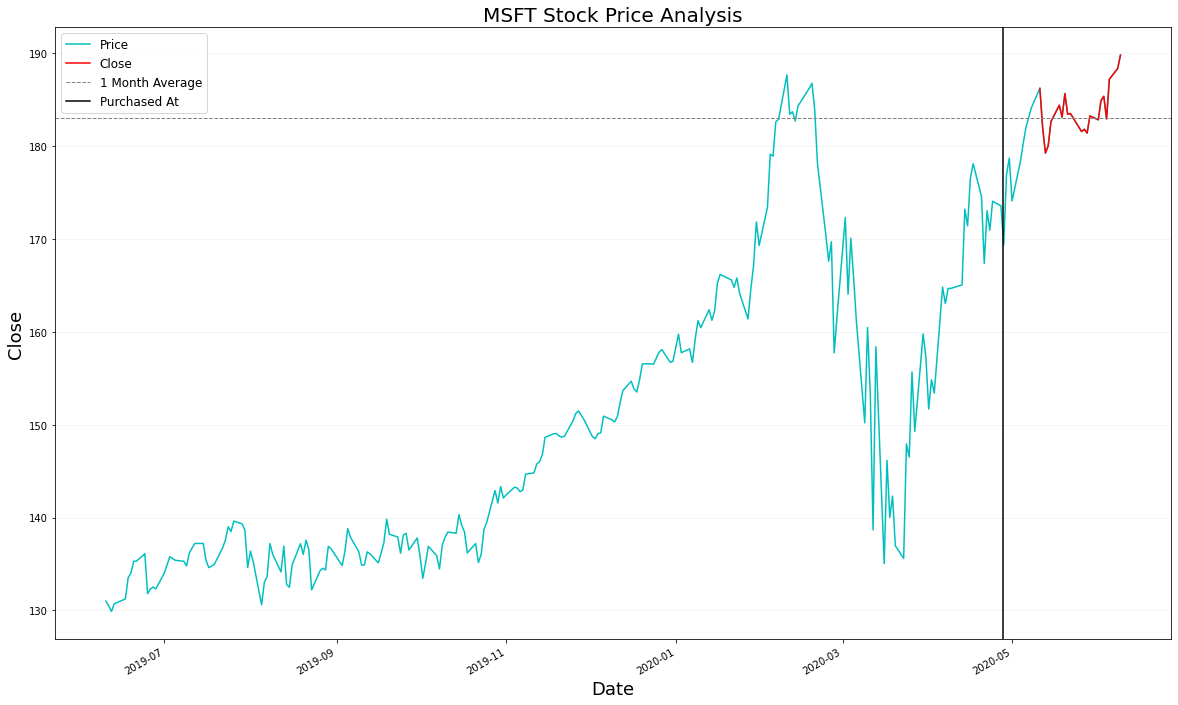

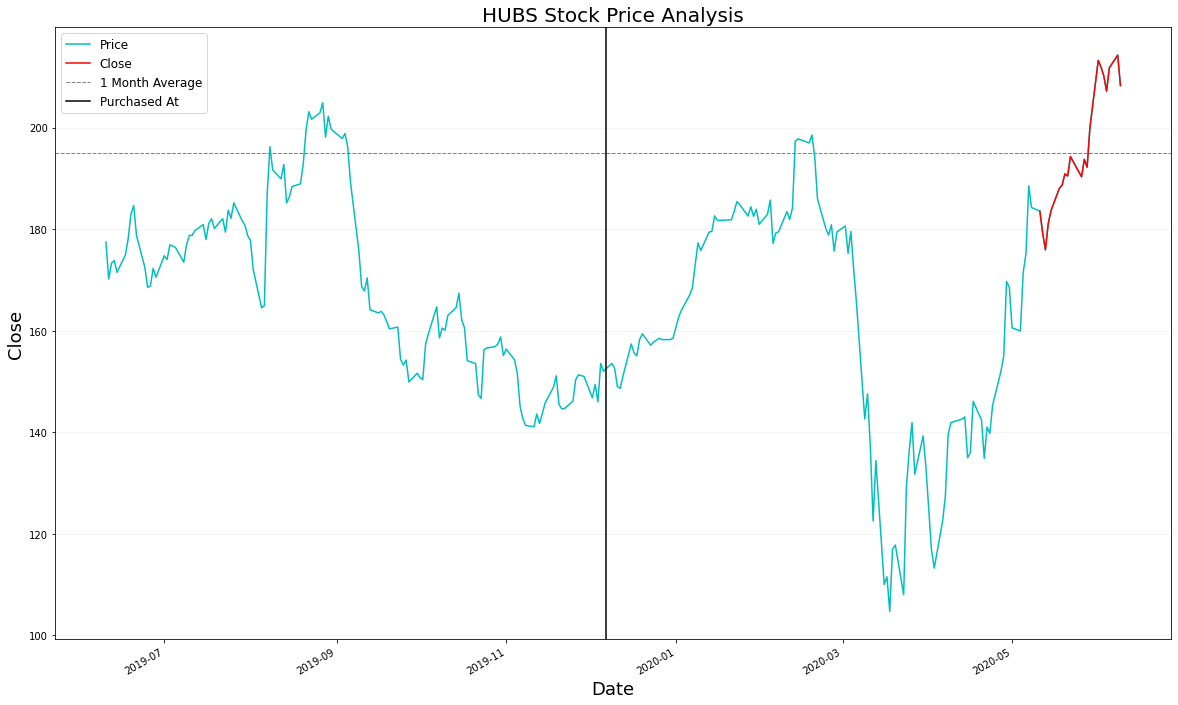

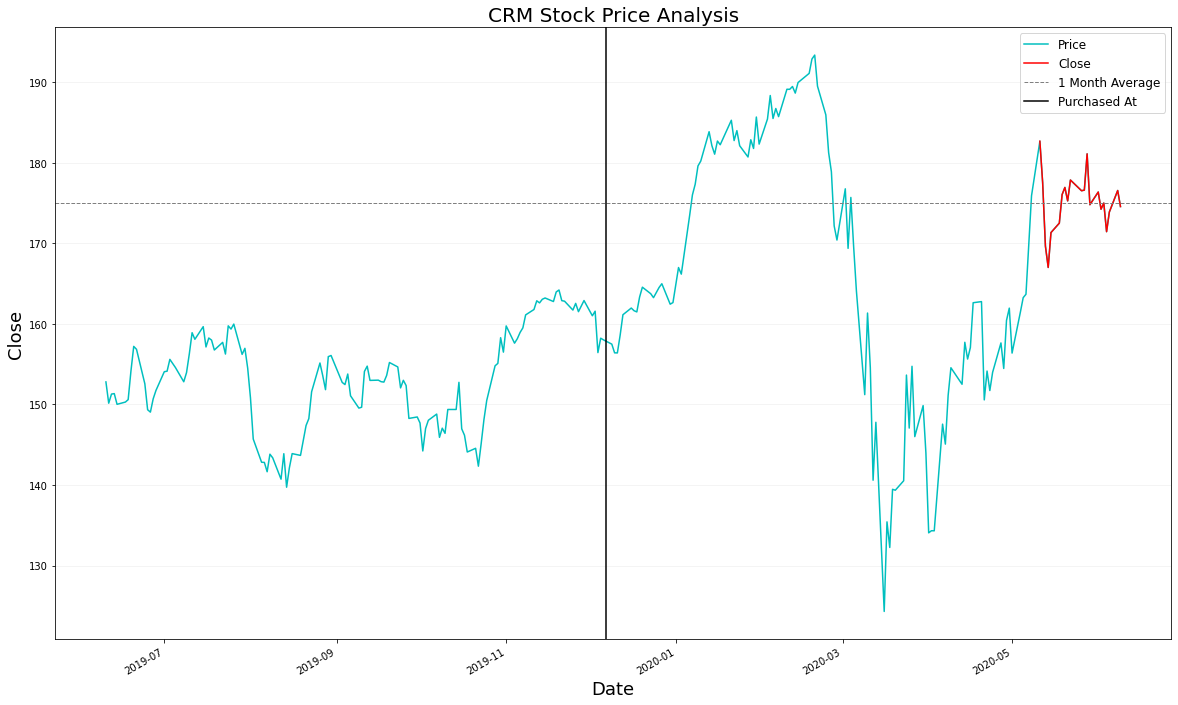

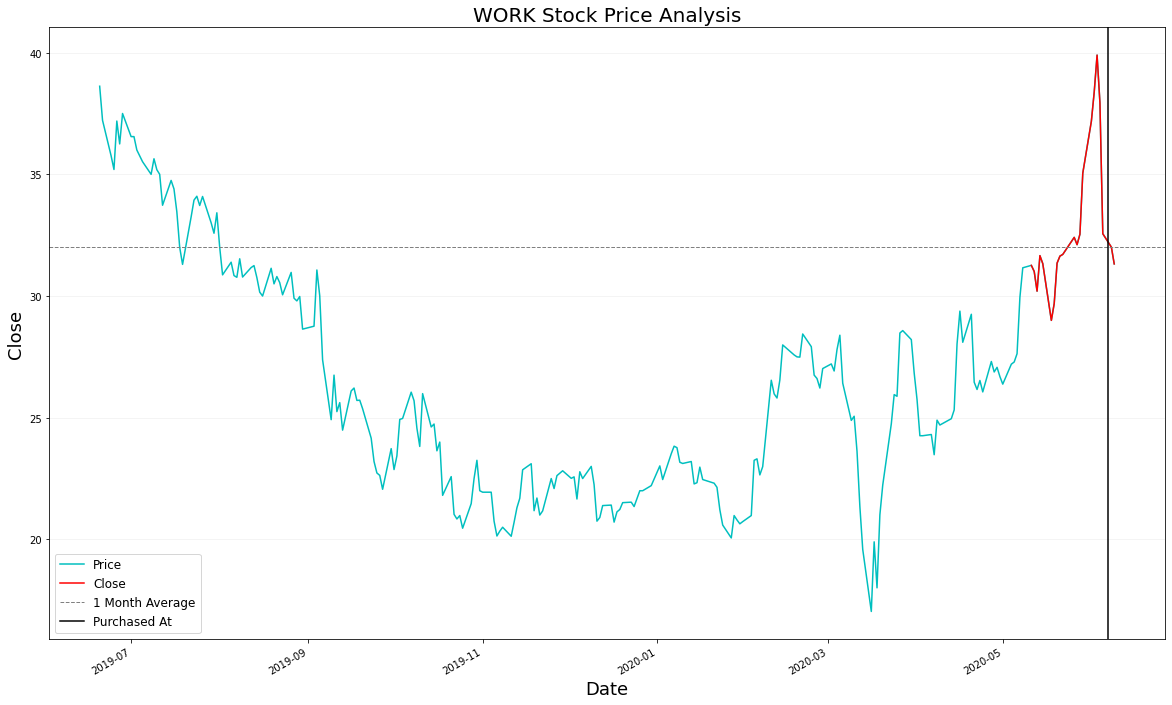

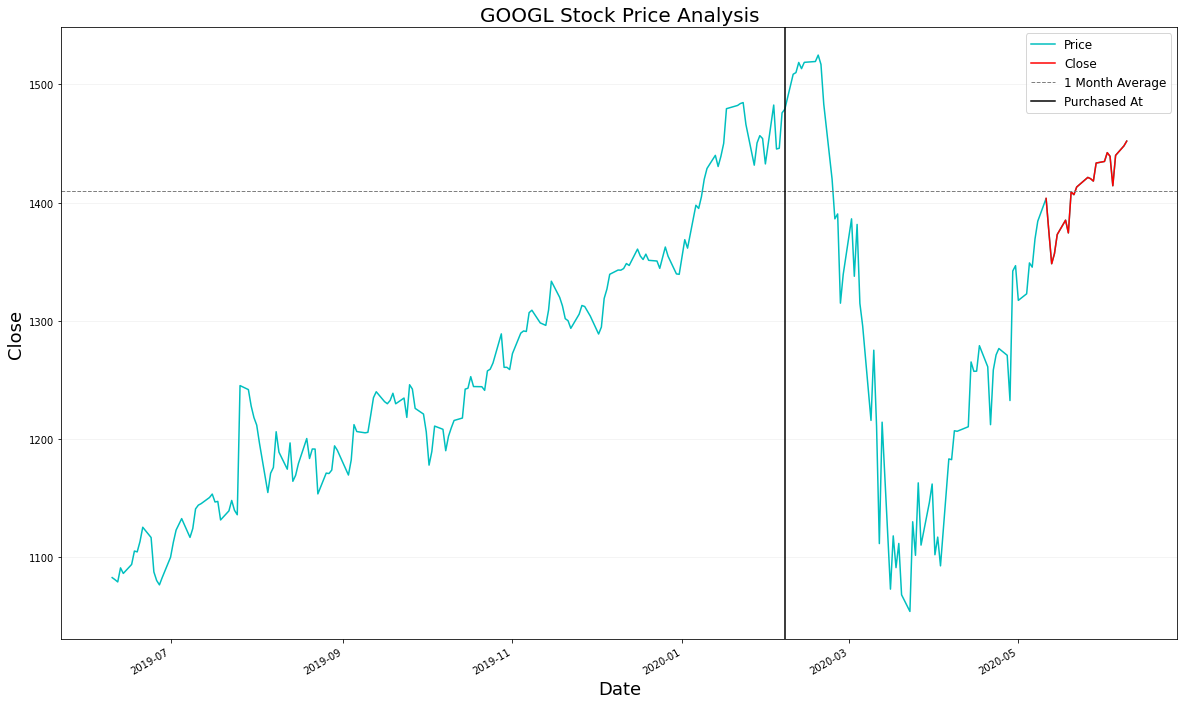

In [68]:
for item in json_response:
 plt.figure(figsize=(20,12.5))
 close = yf.Ticker(item['ticker']).history(period='1y')['Close']
 close1mo = yf.Ticker(item['ticker']).history(period='1mo')['Close']
 close.plot(label='Price',color='c',lw=1.5)
 close1mo.plot(color='red',lw=1.5).axhline(y = item['average'],lw = 1,color='0.5',linestyle='--',label='1 Month Average')
 plt.axvline(x = datetime.fromtimestamp((int(item['purchasedAt']))/1000),lw = 1.5,color='k',label='Purchased At')
 plt.xlabel('Date', fontsize=18)
 plt.legend(fontsize=12)
 title = item['ticker']+' Stock Price Analysis'
 plt.title(title, fontsize=20)
 plt.ylabel('Close',fontsize=18)
 plt.grid(axis='y', color='0.95')
 plt.show()